## 9-1 Neural Net for XOR

In [4]:
import numpy as np
import tensorflow as tf

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2,2]), name = 'weight')
b = tf.Variable(tf.random_normal([2]), name = 'bias') 
layer1 = tf.sigmoid(tf.matmul(X, W)+b)
W2 = tf.Variable(tf.random_normal([2,1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2)+b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y:y_data})
        if step %100 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))
            
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X:x_data, Y:y_data})
    
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
    


0 0.8542291 [[-1.7420385  -0.53999394]
 [-0.8210105  -0.25763524]]
100 0.69391596 [[-1.7511152  -0.61585397]
 [-0.8410202  -0.32540736]]
200 0.69221 [[-1.7608708 -0.5924778]
 [-0.8669549 -0.3015166]]
300 0.69034433 [[-1.7782623  -0.5646203 ]
 [-0.9127613  -0.27479988]]
400 0.6880272 [[-1.8042065  -0.5341701 ]
 [-0.9790309  -0.24650714]]
500 0.68504256 [[-1.8398788  -0.50137454]
 [-1.0659865  -0.21629423]]
600 0.68117595 [[-1.8866558  -0.4664922 ]
 [-1.1733539  -0.18384379]]
700 0.6762402 [[-1.9458696  -0.4298422 ]
 [-1.30003    -0.14894977]]
800 0.6700995 [[-2.018553   -0.39179358]
 [-1.4440086  -0.11155277]]
900 0.6626829 [[-2.1052637  -0.35273138]
 [-1.6026335  -0.0717438 ]]
1000 0.65398824 [[-2.2060075  -0.3130148 ]
 [-1.7730104  -0.02973544]]
1100 0.6440923 [[-2.3202264  -0.2729468 ]
 [-1.9523244   0.01418406]]
1200 0.63317215 [[-2.446781   -0.23276712]
 [-2.1379192   0.05969191]]
1300 0.62151873 [[-2.5839088  -0.1926645 ]
 [-2.3272073   0.10646042]]
1400 0.6095166 [[-2.7292464  -0

 많은 수를 반복 했지만 한번의 Logistic Regression으로는 정확도가 50% 밖에 되지 않음
 Layer를 추가하여 반복수행 하니 정확도 100%

* Layer를 넓게 또는 깊게 할 수 있다.
 - Layer1의 출력을 많이하면 넓게, Layer의 숫자를 늘리면 깊게

## 9-2 Tensorboard for XOR NN

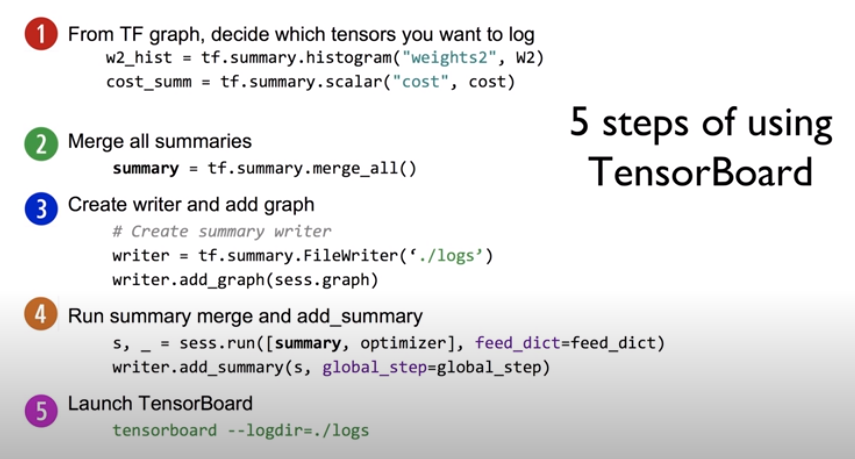